<a href="https://colab.research.google.com/github/ngaeninurul/healthcare_providers_clustering/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Nurul_Ngaeni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

**Dataset yang digunakan dalam proyek ini adalah** **Healthcare Providers Data** yang dapat diunduh dari Kaggle. Dataset ini termasuk dalam kategori data sekunder karena telah tersedia di repositori publik. Dataset ini digunakan untuk analisis clustering dan tidak memiliki label atau kelas yang dapat digunakan untuk supervised learning.  

**Sumber Dataset**:  
- **Sumber**: [Kaggle - Healthcare Providers Data](https://www.kaggle.com/datasets/tamilsel/healthcare-providers-data/data)  
- **Jenis Data**: Data sekunder  

**Deskripsi Dataset**:  
- **Jumlah Baris**: 100,000 baris data  
- **Jumlah Kolom**: 14 kolom, terdiri dari kombinasi data numerikal dan kategorikal.  

**Fitur Dataset**:  

**Kolom Kategorikal**:  
1. `provider_id`: ID unik penyedia layanan kesehatan.  
2. `state`: Lokasi negara bagian tempat penyedia layanan kesehatan berada.  
3. `service_type`: Jenis layanan yang diberikan oleh penyedia layanan kesehatan.  
4. `hospital_type`: Jenis rumah sakit (misalnya, rumah sakit umum, rumah sakit spesialis).  
5. `location`: Lokasi atau wilayah penyedia layanan kesehatan.  
6. `facility_size`: Ukuran fasilitas layanan kesehatan (misalnya kecil, menengah, besar).  
7. dll.

**Kolom Numerik**:  
1. `avg_cost_per_service`: Rata-rata biaya per layanan yang diberikan oleh penyedia.  
2. `patients_served`: Jumlah pasien yang dilayani oleh penyedia layanan kesehatan.  
3. `average_wait_time`: Waktu tunggu rata-rata untuk mendapatkan layanan.  
4. `service_quality`: Skor kualitas layanan penyedia berdasarkan rating.  
5. `total_beds`: Jumlah tempat tidur yang tersedia di fasilitas penyedia layanan kesehatan.  
6. `staff_count`: Jumlah staf yang bekerja di fasilitas layanan kesehatan.  
7. `total_services`: Jumlah total layanan yang disediakan oleh fasilitas.  
8. `available_equipment`: Jumlah peralatan medis yang tersedia di fasilitas.  
9. dll.

**Tema Dataset**:  
- **Data Medis/Kesehatan**:  
Dataset ini berfokus pada penyedia layanan kesehatan dan memberikan informasi penting terkait biaya layanan, jumlah pasien, waktu tunggu, kualitas layanan, serta kapasitas fasilitas yang tersedia.  


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
data = pd.read_csv('/content/Healthcare Providers.csv')
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Tampilkan informasi umum tentang dataset
print("Informasi dataset:")
data.info()

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null 

In [8]:
# Konversi kolom yang tipe datanya salah (object ke numerik)
columns_to_convert = [
    "Number of Services",
    "Number of Medicare Beneficiaries",
    "Number of Distinct Medicare Beneficiary/Per Day Services",
    "Average Medicare Allowed Amount",
    "Average Submitted Charge Amount",
    "Average Medicare Payment Amount",
    "Average Medicare Standardized Amount",
]

# Konversi kolom
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Periksa hasilnya
print(data[columns_to_convert].dtypes)

Number of Services                                          float64
Number of Medicare Beneficiaries                            float64
Number of Distinct Medicare Beneficiary/Per Day Services    float64
Average Medicare Allowed Amount                             float64
Average Submitted Charge Amount                             float64
Average Medicare Payment Amount                             float64
Average Medicare Standardized Amount                        float64
dtype: object


In [9]:
# Tinjau jumlah baris dan kolom
print("Jumlah baris dan kolom dalam dataset:", data.shape)

# Tinjau jenis data (numerik & kategorikal)
kolom_numerik = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nKolom Numerik:", kolom_numerik)
kolom_kategorik = data.select_dtypes(include=['object']).columns.tolist()
print("Kolom Kategorikal:", kolom_kategorik)

Jumlah baris dan kolom dalam dataset: (100000, 27)

Kolom Numerik: ['index', 'National Provider Identifier', 'Zip Code of the Provider', 'Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']
Kolom Kategorikal: ['Last Name/Organization Name of the Provider', 'First Name of the Provider', 'Middle Initial of the Provider', 'Credentials of the Provider', 'Gender of the Provider', 'Entity Type of the Provider', 'Street Address 1 of the Provider', 'Street Address 2 of the Provider', 'City of the Provider', 'State Code of the Provider', 'Country Code of the Provider', 'Provider Type', 'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code', 'HCPCS Description', 'HCPCS Drug Indicator']


In [10]:
# Menampilkan statistik deskriptif untuk variabel numerik
data.describe()

,index,National Provider Identifier,Zip Code of the Provider,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,1.000000e+05,1.000000e+05,1.000000e+05,97347.000000,99595.000000,98500.000000,99255.000000,93277.000000,99534.000000,99530.000000
mean,4.907646e+06,1.498227e+09,4.163820e+08,100.574791,69.228576,95.835117,87.455376,190.608753,68.803728,69.373304
std,2.839633e+06,2.874125e+08,3.082566e+08,149.868363,101.900825,143.826162,103.400171,191.077150,91.177496,91.448226
min,2.090000e+02,1.003001e+09,6.010000e+02,11.000000,11.000000,11.000000,0.010000,0.010000,0.008679,0.008679
25%,2.458791e+06,1.245669e+09,1.426300e+08,20.000000,17.000000,20.000000,24.165714,53.000000,19.227886,19.992056
50%,4.901266e+06,1.497847e+09,3.633025e+08,41.000000,32.000000,39.000000,64.290000,132.000000,46.783766,47.637718
75%,7.349450e+06,1.740374e+09,6.819881e+08,106.000000,74.000000,101.000000,112.237335,250.000000,84.177272,84.130000
max,9.847440e+06,1.993000e+09,9.990166e+08,999.000000,999.000000,999.000000,999.848235,999.736842,998.620000,998.775000


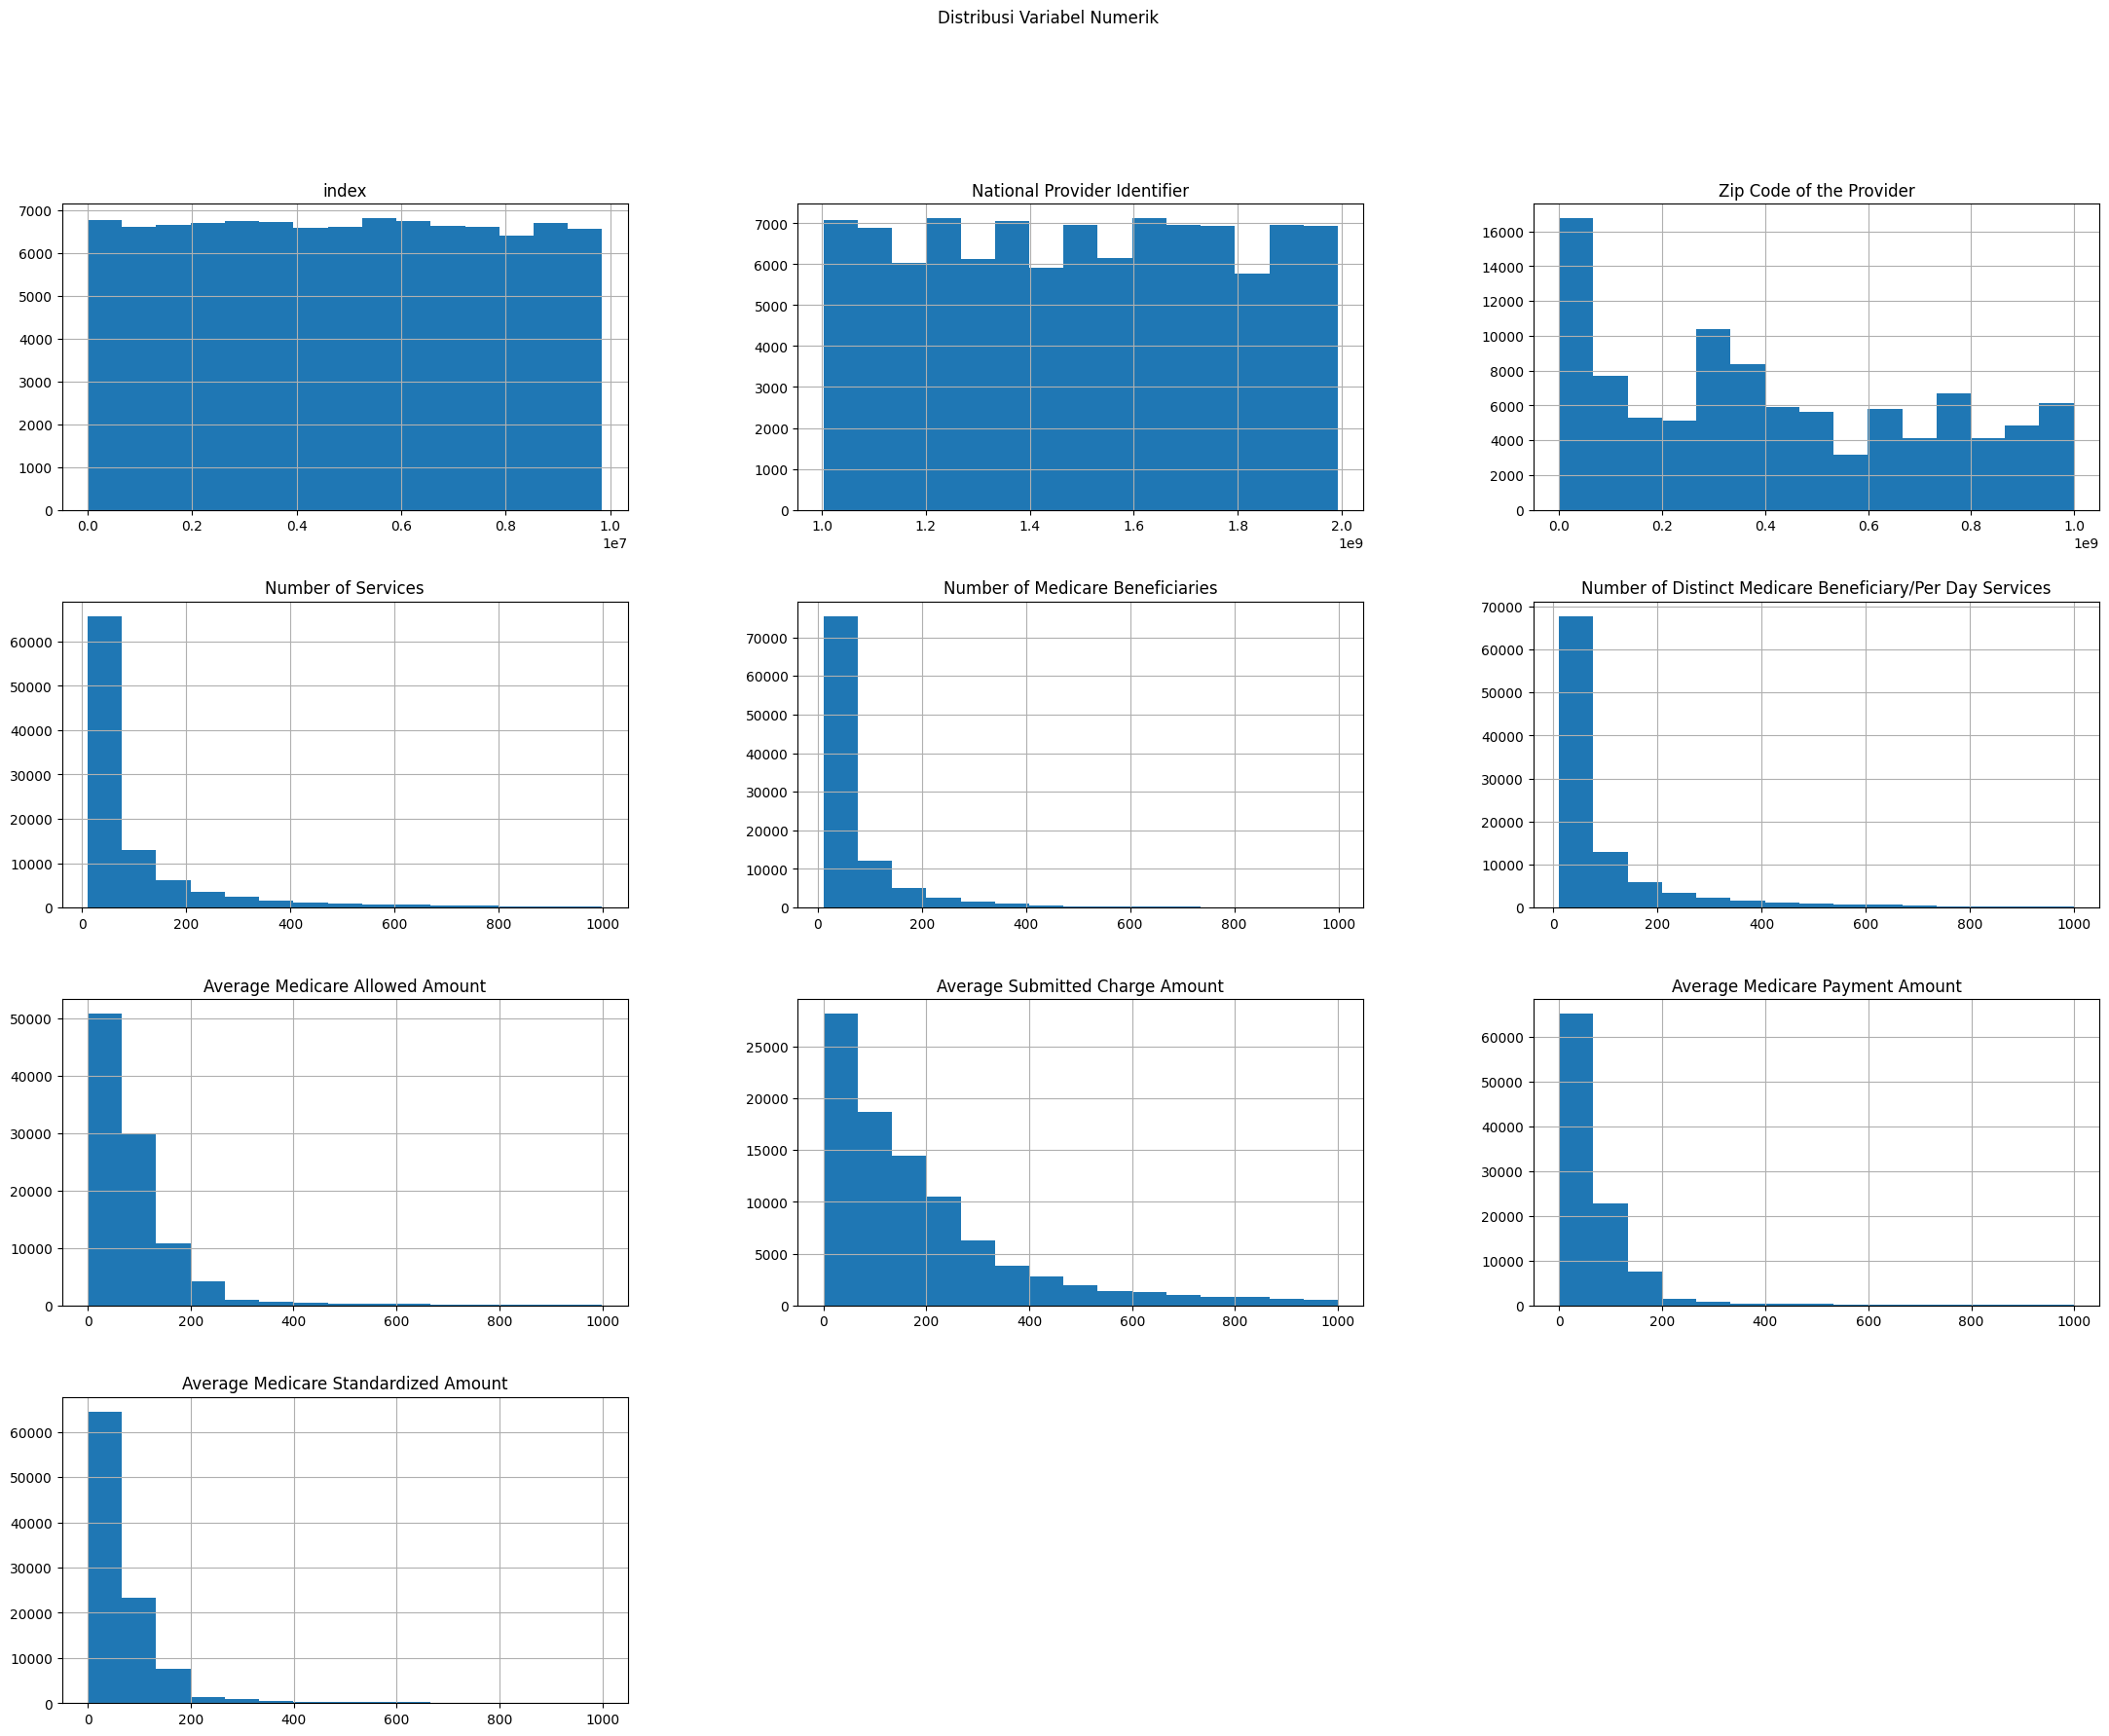

In [16]:
# Histogram untuk distribusi variabel numerik
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns].hist(bins=15, figsize=(27, 20))
plt.suptitle('Distribusi Variabel Numerik')
plt.show()

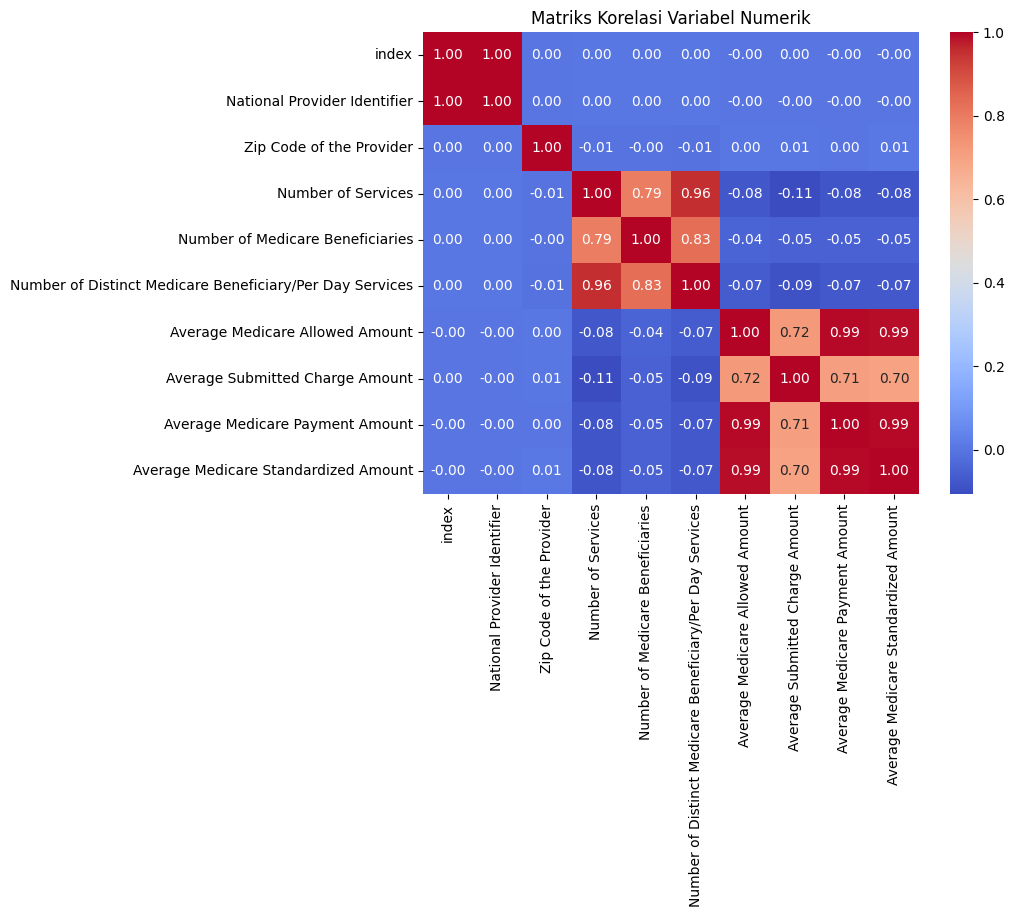

In [17]:
# Matriks Korelasi
correlation_matrix = data[numerical_columns].corr()

# Visualisasi Matriks Korelasi dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

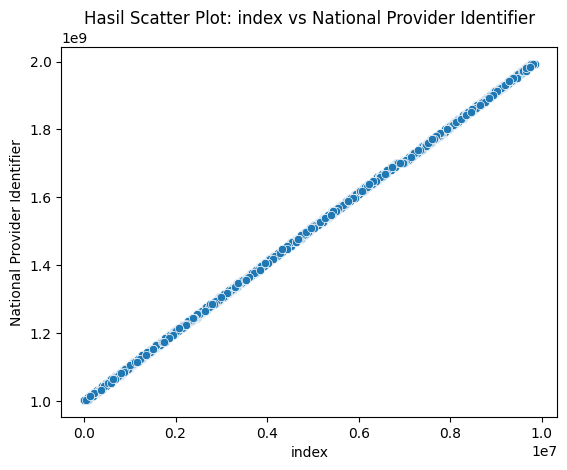

In [18]:
# Scatter plot untuk memeriksa hubungan antar dua variabel
sns.scatterplot(x=data[numerical_columns[0]], y=data[numerical_columns[1]])
plt.title(f'Hasil Scatter Plot: {numerical_columns[0]} vs {numerical_columns[1]}')
plt.show()

In [1]:
# Visualisasi distribusi variabel kategorikal
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=data[column])
    plt.title(f'Distribusi {column}')
    plt.xticks(rotation=45)
    plt.show()

NameError: name 'data' is not defined

In [ ]:
# Pairplot untuk menganalisis korelasi antar variabel numerik
sns.pairplot(data[numerical_columns])
plt.suptitle('Pairplot Variabel Numerik', y=1.02)
plt.show()

# **5. Data Preprocessing**

In [23]:
# Cek missing value
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0
Description,1454
CustomerID,135080


In [24]:
# cek duplikasi data
print("Duplicates: ", data.duplicated().sum())

Duplicates:  5268


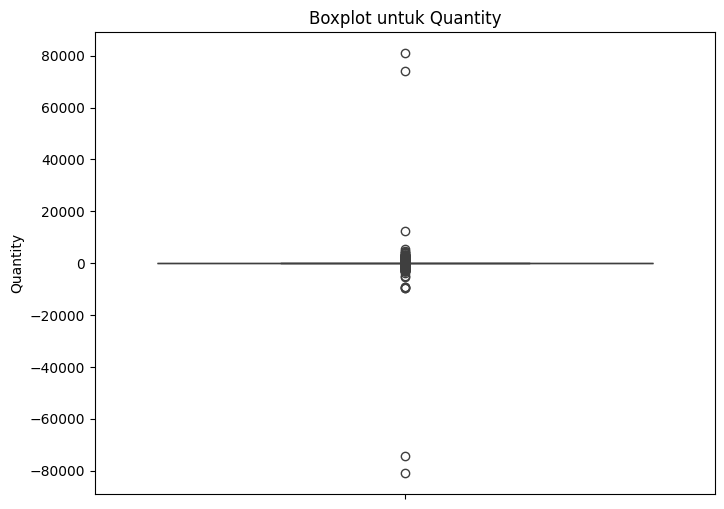

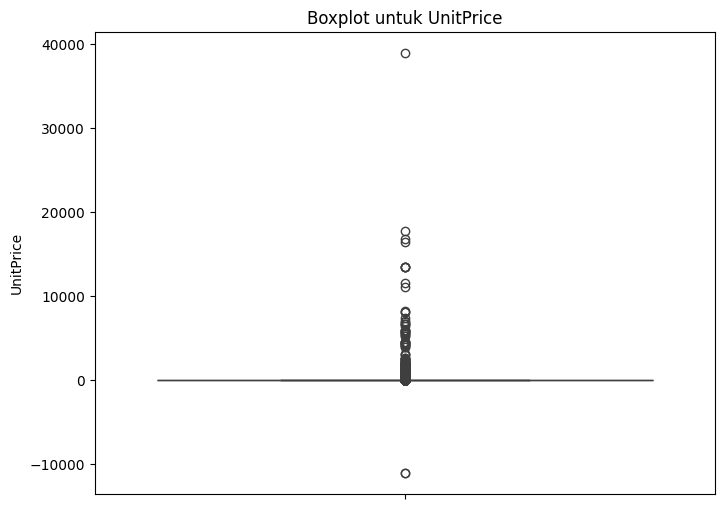

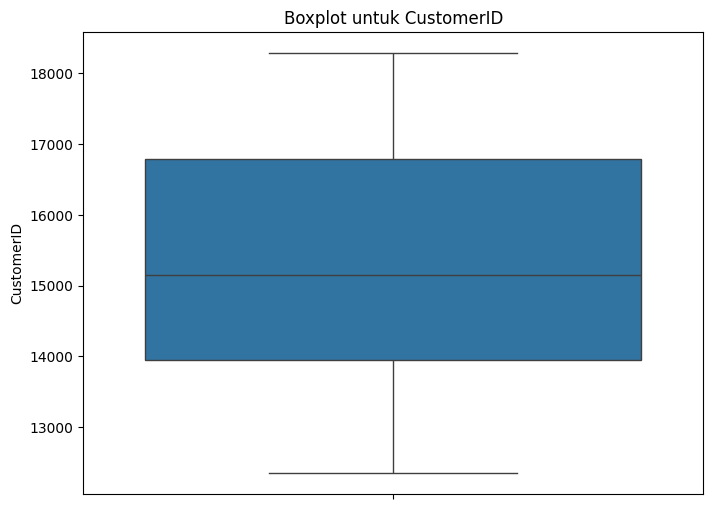

In [39]:
# Boxplot untuk mengidentifikasi outlier pada variabel numerik
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[column])
    plt.title(f'Boxplot untuk {column}')
    plt.show()

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
#Type your code here

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.